In [54]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

shp_file_name = "/media/sf_VM_shared_folder/NSW-locality-shapes/NSW_LOCALITY_POLYGON_shp.shp"
#zip_file_name = "nswlocalitypolygonshp.zip"
#web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
#                "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
"""
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()
"""

'\ndef unzip_zipfile(zipped_file_path, put_it_here="."):\n    import zipfile\n    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, \'r\')\n    zip_of_suburbs.extractall(put_it_here)\n    zip_of_suburbs.close()\n'

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
"""
if os.path.isfile(shp_file_name):
   print "loading from file"
else:
    if os.path.isfile(zip_file_name):
        print "unzipping"
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print "done"
"""

'\nif os.path.isfile(shp_file_name):\n   print "loading from file"\nelse:\n    if os.path.isfile(zip_file_name):\n        print "unzipping"\n        unzip_zipfile(zip_file_name)\n    else:\n        import requests\n        print "loading from the internet"\n        page = requests.get(web_file_path)\n        with open(zip_file_name, \'wb\') as z:\n            z.write(page.content)\n        unzip_zipfile(zip_file_name)\n\nprint "done"\n'

In [35]:
suburbs = gp.GeoDataFrame.from_file(shp_file_name)
suburbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
suburbs[10:20].head(2)

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
10,2015-09-03,25101,NSW4391,2015-11-10,WOLLSTONECRAFT,G,None,1,"POLYGON ((151.19807629946 -33.82565730712, 151..."
11,2015-09-03,24909,NSW3339,2015-11-10,RANDWICK,G,None,1,"POLYGON ((151.24494816991 -33.90276364158, 151..."


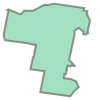

In [11]:
a = suburbs.iloc[11]
a.geometry

In [48]:
def find_centroid(row):
    return row.geometry.centroid

suburbs['centroid'] = suburbs.apply(find_centroid, axis=1)
a = suburbs.iloc[11]

suburbs.head()

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid
0,2015-09-03,25113,NSW1147,2015-11-10,CROYDON PARK,G,None,1,"POLYGON ((151.1170000066 -33.89151546943, 151....",POINT (151.1028906456905 -33.89725556028139)
1,2015-09-03,25065,NSW2557,2015-11-10,MAYFIELD WEST,G,None,1,"POLYGON ((151.73344571654 -32.87974104891, 151...",POINT (151.7246099649729 -32.88497041458911)
2,2015-09-03,25115,NSW797,2015-11-10,CAMPSIE,G,None,1,"POLYGON ((151.1072750656 -33.9017926364, 151.1...",POINT (151.1028579688347 -33.91231130168283)
3,2011-11-22,16193,NSW4136,2012-02-04,WALLACETOWN,G,None,1,"POLYGON ((147.450924738497 -34.9651865379095, ...",POINT (147.472286229532 -34.97483543749741)
4,2015-09-03,24884,NSW812,2015-11-10,CANTERBURY,G,None,1,"POLYGON ((151.11758210952 -33.90297173141, 151...",POINT (151.1160651266154 -33.91235927742964)


In [49]:
suburbs_csv = open('/home/alexlewis/Sydney-property-adventure/reference/suburbs_list.csv')
suburb_list = csv.reader(suburbs_csv, delimiter=",")
city_suburbs = []

for x in suburb_list:
    city_suburbs.append(x[0].upper())

print city_suburbs

['ALEXANDRIA', 'ANNANDALE', 'BARANGAROO', 'BEACONSFIELD', 'CAMPERDOWN', 'CENTENNIAL PARK', 'CHIPPENDALE', 'DARLINGHURST', 'DARLINGTON', 'DAWES POINT', 'ELIZABETH BAY', 'ERSKINEVILLE', 'EVELEIGH', 'FOREST LODGE', 'GLEBE', 'HAYMARKET', 'MILLERS POINT', 'MOORE PARK', 'NEWTOWN', 'PADDINGTON', 'POTTS POINT', 'PYRMONT', 'REDFERN', 'ROSEBERY', 'RUSHCUTTERS BAY', 'ST PETERS', 'SURRY HILLS', 'SYDNEY', 'THE ROCKS', 'ULTIMO', 'WATERLOO', 'WOOLLOOMOOLOO', 'ZETLAND']


In [28]:
boolean_list = [x in city_suburbs for x in suburbs["NSW_LOCA_2"]]

print boolean_list

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [77]:
suburbs_slice = suburbs[boolean_list]

suburbs_slice.head(50)

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid
374,2015-09-03,24908,NSW887,2015-11-10,CENTENNIAL PARK,G,None,1,"POLYGON ((151.23413833637 -33.88983641741, 151...",POINT (151.2336036446902 -33.89787950480218)
596,2011-05-17,14765,NSW4555,2008-09-11,ZETLAND,G,None,1,"POLYGON ((151.209525712961 -33.9037001623341, ...",POINT (151.2086003899995 -33.90745302281657)
715,2012-08-15,18351,NSW1224,2012-10-30,DARLINGTON,G,None,1,"POLYGON ((151.161625907092 -32.5569969007578, ...",POINT (151.1609338213606 -32.55898728879547)
944,2016-09-12,26621,NSW3475,2016-11-11,RUSHCUTTERS BAY,G,None,1,"POLYGON ((151.22892295847 -33.87226946419, 151...",POINT (151.228001545878 -33.8747284818559)
1447,2015-02-24,23875,NSW30,2015-05-08,ALEXANDRIA,G,None,1,"POLYGON ((151.197606264216 -33.8949608467705, ...",POINT (151.1928183451413 -33.90986244954903)
1448,2015-02-24,23876,NSW3436,2015-05-08,ROSEBERY,G,None,1,"POLYGON ((151.212263966759 -33.922876687765, 1...",POINT (151.2047934203869 -33.91889933129609)
1668,2014-12-02,23590,NSW3677,2015-02-12,ST PETERS,G,None,1,"POLYGON ((151.181529124436 -33.9135575102768, ...",POINT (151.1761726885727 -33.91580811670737)
1739,2012-02-16,16617,NSW4218,2012-05-04,WATERLOO,G,None,1,"POLYGON ((151.199274191935 -33.8951853227524, ...",POINT (151.2073002942986 -33.89987675752816)
1750,2012-08-15,18012,NSW3875,2012-10-30,THE ROCKS,G,None,1,"POLYGON ((151.210156140695 -33.8548444286965, ...",POINT (151.2081518520549 -33.8594610070376)
2020,2012-08-15,17916,NSW3282,2012-10-30,POTTS POINT,G,None,1,"POLYGON ((151.229868541802 -33.858121830023, 1...",POINT (151.2254468420188 -33.8674408310124)


In [75]:
sydney_point = shapely.geometry.point.Point(151.2093318937477, -33.86885141291842)

suburbs_slice["distance_from_sydney"] = suburbs_slice.geometry.distance(sydney_point)
suburbs_slice.head()

AttributeError: 'float' object has no attribute 'distance'

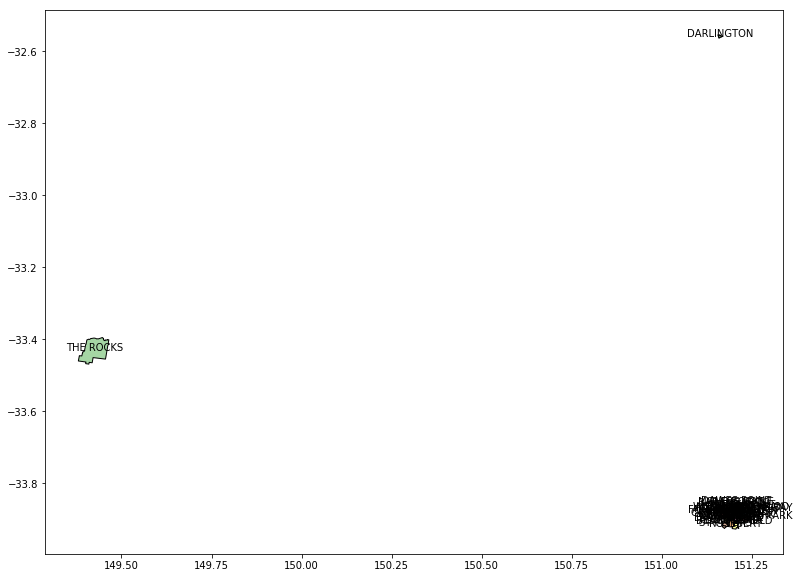

In [78]:
suburbs_slice.geometry.plot()

for idx, row in suburbs_slice.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')